In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from tqdm import tqdm
import os

import math
import logging

import random
import pickle
import warnings
import gc
CHUNKSIZE = 50000

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt

warnings.filterwarnings(action='ignore')
#pd.set_option('mode.chained_assignment',  None) # 경고 off

In [38]:
plt.style.use('fivethirtyeight') 

In [10]:
import scipy as sci
from imblearn import under_sampling, over_sampling, combine
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#import catboost as cb
import xgboost as xgb

from scipy.stats import spearmanr

from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import confusion_matrix,roc_auc_score, classification_report, precision_recall_curve, balanced_accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score, auc


from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import *
from imblearn.ensemble import BalancedBaggingClassifier

In [11]:
def loaddata(fname:str, chunksize:int, dtype:dict=None, columns:list=None):
    df = pd.DataFrame()
    for chunk in tqdm(pd.read_csv(fname, engine='python', low_memory=True, chunksize=chunksize)):
        df = pd.concat([df, chunk], axis=0)
        del chunk
        gc.collect()
    return df


def viewinfo(df:pd.DataFrame) -> None:
    print(df.shape)
    print()
    df.info()
    print()
    display(df.head())

In [12]:
df=loaddata('supermarket_sales.csv',chunksize=CHUNKSIZE)
display(df)
display(viewinfo(df))

1it [00:00,  8.85it/s]


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


(1000, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


None

-----
#### (a)  Please provide any useful information (e.g., figures, tables, etc.) to understand customers and product categories.  
     

In [13]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
display(df['Invoice ID'].nunique()) == display(len(df))

1000

1000

True

In [15]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

- type에 따른 여러가지 Pivot table 생성하기
- product line에 대한 분포 그래프
- product line에서 소비관련 table 만들기
    - payment, cog
    - 소비 시간 분석하기
   
     
- Date,time 사용해서 weekday,weekend 변수 생성하기


In [ ]:
display(pd.pivot_table(df, index=['Payment','Customer type'], columns ='Product line',
              values = ['Total'],
               aggfunc = np.sum, margins=True, margins_name='Total'))

display(pd.pivot_table(df, index='Payment', columns ='Product line',
              values = ['Total'],
               aggfunc = np.sum, margins=True, margins_name='Total'))

Total                      \
Product line              Electronic accessories Fashion accessories   
Payment     Customer type                                              
Cash        Member                     8405.5020           6456.2925   
            Normal                    12324.4800          11157.4995   
Credit card Member                     6935.1030           9056.5755   
            Normal                     8492.9145           8278.4940   
Ewallet     Member                     9157.8900          10811.0940   
            Normal                     9021.6420           8545.9395   
Total                                 54337.5315          54305.8950   

                                                                \
Product line              Food and beverages Health and beauty   
Payment     Customer type                                        
Cash        Member                10757.9955         8981.7420   
            Normal                 8452.8780         8207.3670   
Credit card Member                11759.0655         9603.2055   
            Normal                 8476.1250         6366.2655   
Ewallet     Member                 8840.5590         7246.0920   
            Normal                 7858.2210         8789.0670   
Total                             56144.8440        49193.7390   

                                                                             
Product line              Home and lifestyle Sports and travel        Total  
Payment     Customer type                                                    
Cash        Member                11564.3640         8495.1195   54661.0155  
            Normal                 7024.6365        10378.6935   57545.5545  
Credit card Member                 7777.8540        12639.6690   57771.4725  
            Normal                 6205.2165         5176.5840   42995.5995  
Ewallet     Member                 8635.8090         7099.5120   51790.9560  
            Normal                12654.0330        11333.2485   58202.1510  
Total                             53861.9130        55122.8265  322966.7490

Total                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
Payment                                                                      
Cash                     20729.9820          17613.7920         19210.8735   
Credit card              15428.0175          17335.0695         20235.1905   
Ewallet                  18179.5320          19357.0335         16698.7800   
Total                    54337.5315          54305.8950         56144.8440   

                                                                     \
Product line Health and beauty Home and lifestyle Sports and travel   
Payment                                                               
Cash                 17189.109         18589.0005        18873.8130   
Credit card          15969.471         13983.0705        17816.2530   
Ewallet              16035.159         21289.8420        18432.7605   
Total                49193.739         53861.9130        55122.8265   

                          
Product line       Total  
Payment                   
Cash          112206.570  
Credit card   100767.072  
Ewallet       109993.107  
Total         322966.749

In [ ]:
pd.pivot_table(df, index=['Branch','Customer type'], columns= 'Product line',
              values='cogs', aggfunc=np.sum, margins=True, margins_name='Total')

Product line          Electronic accessories  Fashion accessories  \
Branch Customer type                                                
A      Member                        8710.18              6611.98   
       Normal                        8734.69              8942.79   
B      Member                        7071.29              6990.03   
       Normal                        9168.18              8641.70   
C      Member                        7550.43             11468.43   
       Normal                       10515.26              9064.97   
Total                               51750.03             51719.90   

Product line          Food and beverages  Health and beauty  \
Branch Customer type                                          
A      Member                    8454.34            6132.28   
       Normal                    7891.47            5865.58   
B      Member                    8974.40           10788.40   
       Normal                    5515.97            8240.80   
C      Member                   12435.66            7680.31   
       Normal                   10199.44            8143.81   
Total                           53471.28           46851.18   

Product line          Home and lifestyle  Sports and travel      Total  
Branch Customer type                                                    
A      Member                   11958.38            9216.15   51083.31  
       Normal                    9391.33            9234.04   50059.90  
B      Member                    7399.34            9923.86   51147.32  
       Normal                    9314.15            9112.52   49993.32  
C      Member                    7288.02            7749.80   54172.65  
       Normal                    5945.84            7261.56   51130.88  
Total                           51297.06           52497.93  307587.38

In [19]:
#summation of total price
display(pd.pivot_table(df, index='Branch', columns =['Product line'],
              values = ['Total'],
               aggfunc = np.sum, margins=True, margins_name='Total'))

#mean
display(pd.pivot_table(df, index='Branch', columns =['Product line'],
              values = ['Total'],
               aggfunc = np.mean, margins=True, margins_name='Total'))

Total                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
Branch                                                                       
A                        18317.1135          16332.5085         17163.1005   
B                        17051.4435          16413.3165         15214.8885   
C                        18968.9745          21560.0700         23766.8550   
Total                    54337.5315          54305.8950         56144.8440   

                                                                     \
Product line Health and beauty Home and lifestyle Sports and travel   
Branch                                                                
A                    12597.753         22417.1955        19372.6995   
B                    19980.660         17549.1645        19988.1990   
C                    16615.326         13895.5530        15761.9280   
Total                49193.739         53861.9130        55122.8265   

                           
Product line        Total  
Branch                     
A             106200.3705  
B             106197.6720  
C             110568.7065  
Total         322966.7490

Total                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
Branch                                                                       
A                        305.285225          320.245265         295.915526   
B                        310.026245          264.730911         304.297770   
C                        344.890445          331.693385         360.103864   
Total                    319.632538          305.089298         322.671517   

                                                                     \
Product line Health and beauty Home and lifestyle Sports and travel   
Branch                                                                
A                   268.037298         344.879931        328.350839   
B                   376.993585         350.983290        322.390306   
C                   319.525500         308.790067        350.265067   
Total               323.643020         336.636956        332.065220   

                          
Product line       Total  
Branch                    
A             312.354031  
B             319.872506  
C             337.099715  
Total         322.966749

### graph

In [21]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [22]:
categoric = ['Branch','City','Customer type', 'Gender','Payment']
numerics = ['Unit price','Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']

In [23]:
def categoric_graph(data, col_names, col_num, row_num, hue_col):
    col_num=col_num
    row_num=row_num
    fig, ax = plt.subplots(ncols=col_num, nrows=row_num, figsize=(20,row_num*5))
    ax=ax.flatten()

    for i, col in enumerate(col_names):
        sns.countplot(x=col, hue=hue_col ,palette='Set2', data=data, ax=ax[int(i/col_num)])

    return

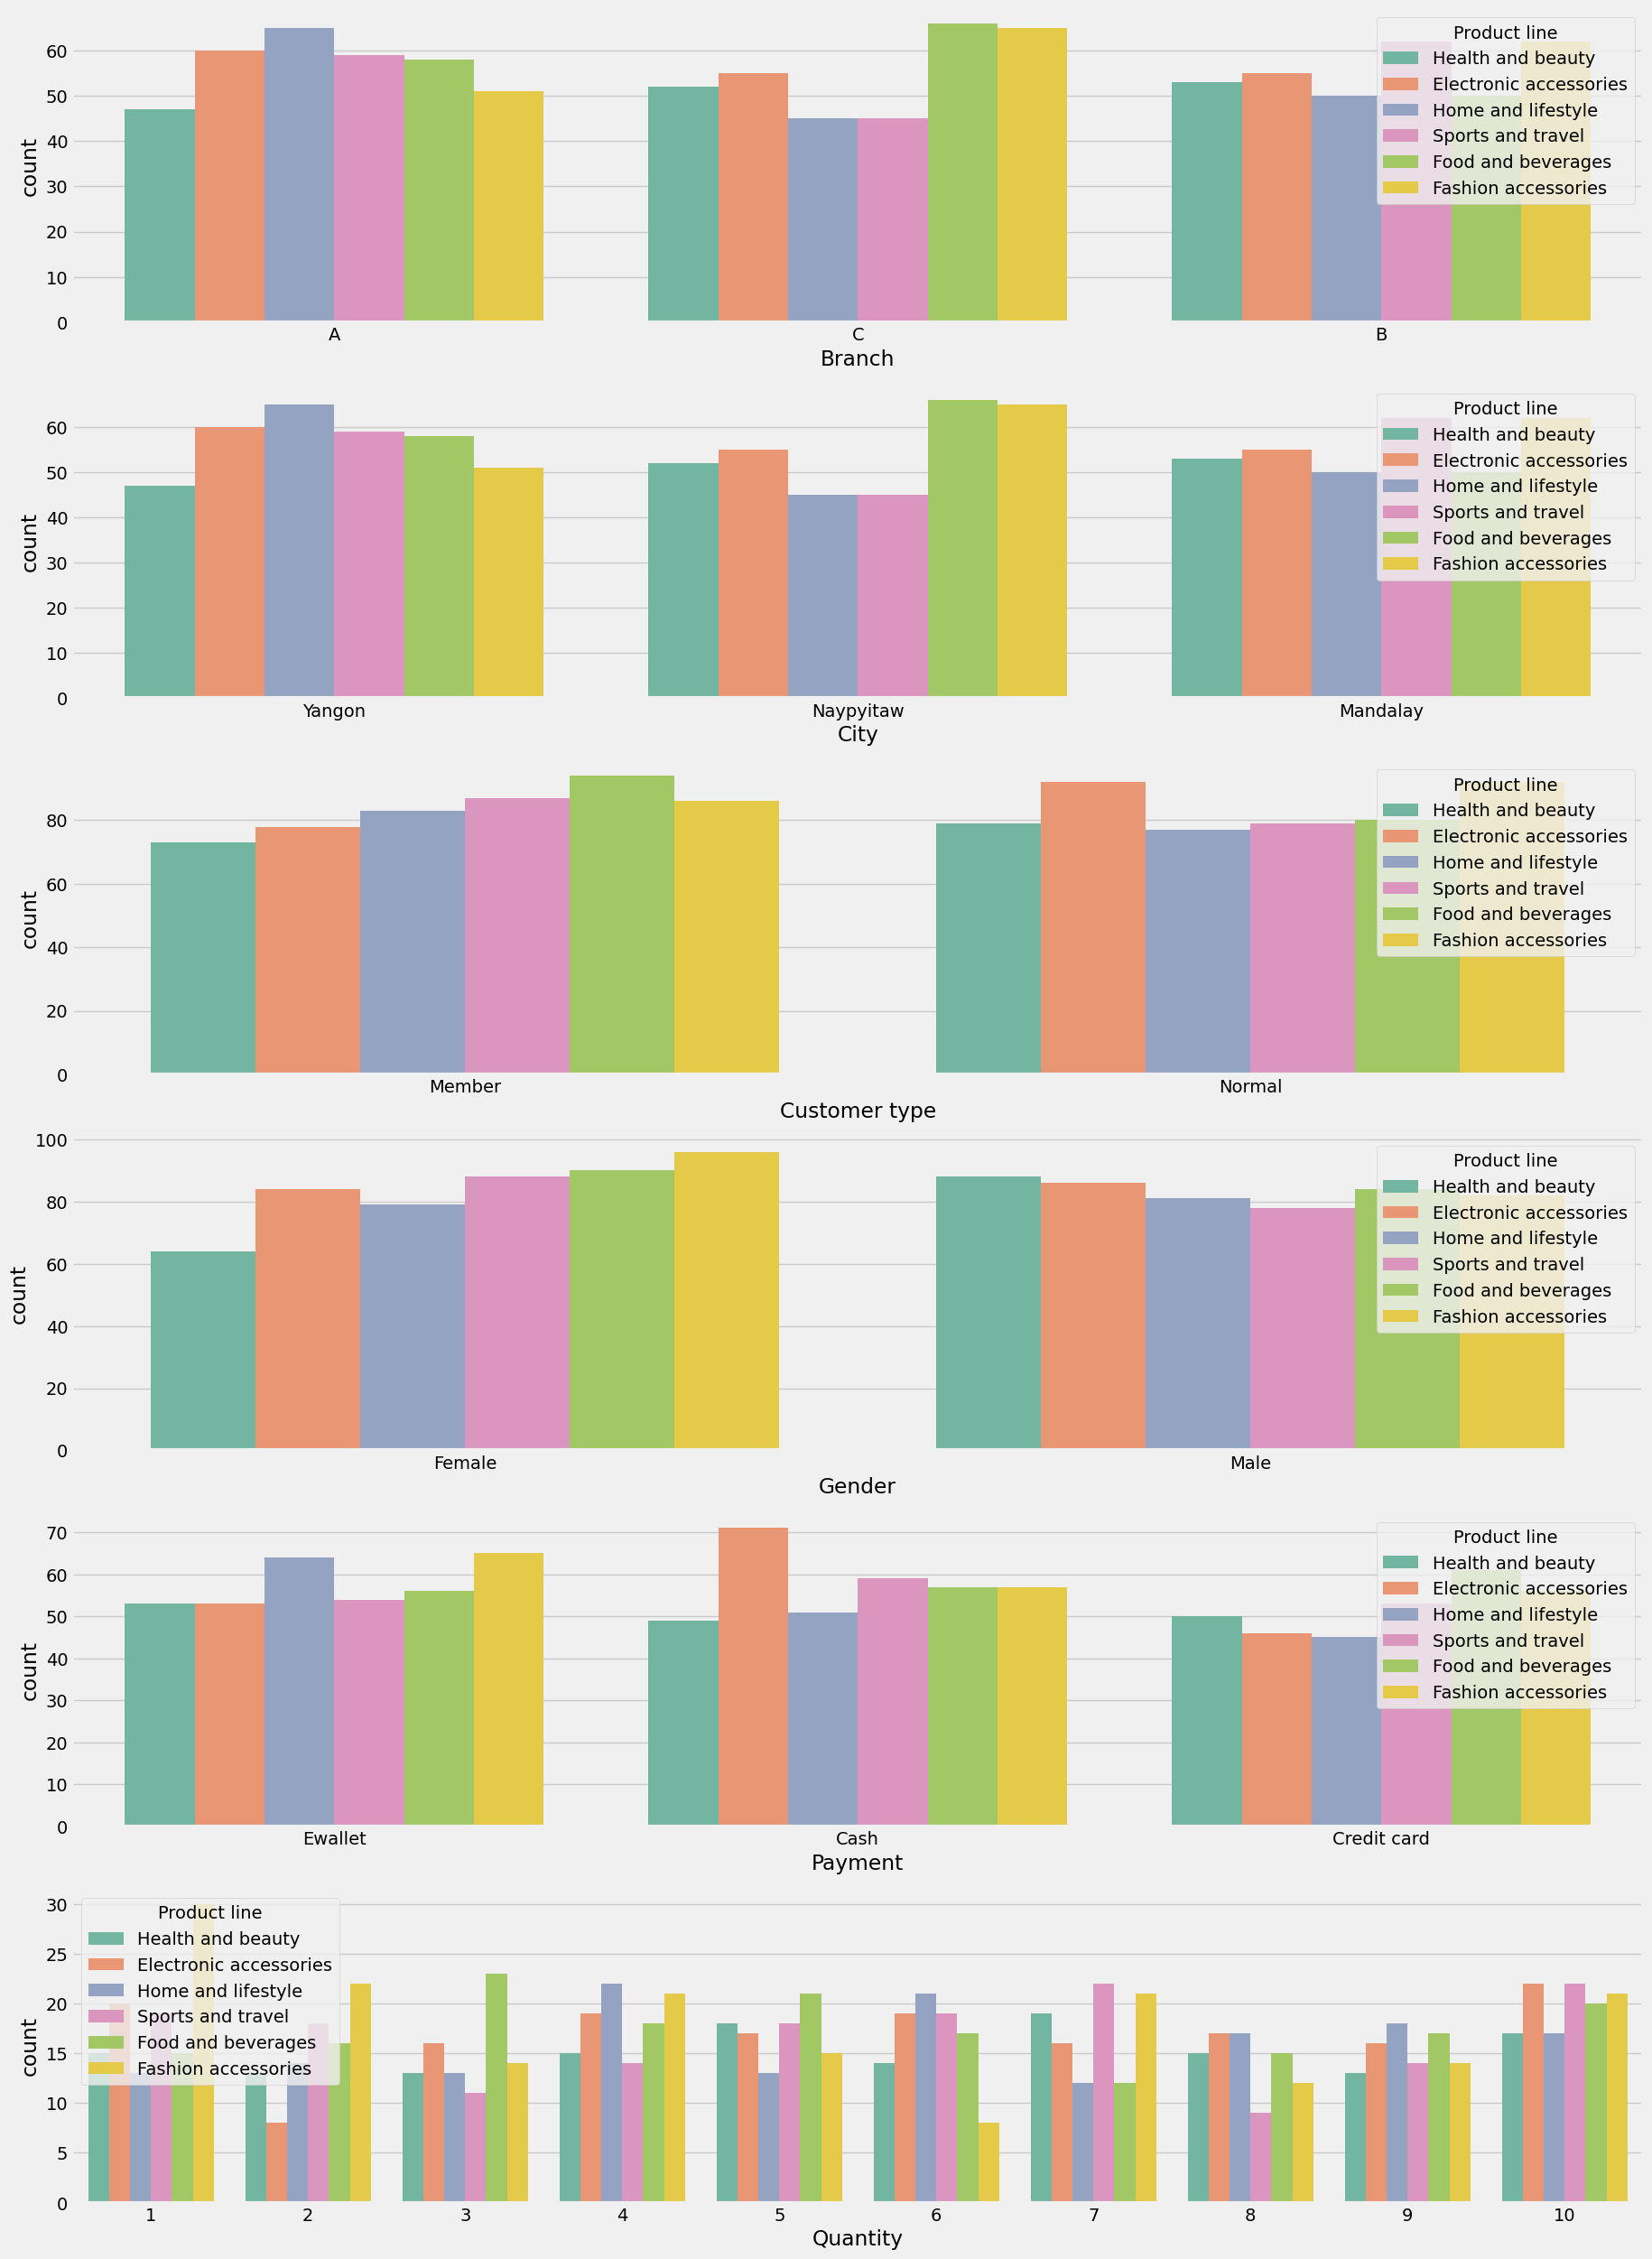

In [39]:
categoric = ['Branch','City','Customer type', 'Gender','Payment','Quantity']

categoric_graph(df, categoric, 1,6,'Product line')

In [25]:
def continuous_graph(data, col_names, col_num, row_num):
    col_num=col_num
    row_num=row_num
    fig, ax = plt.subplots(ncols=col_num, nrows=row_num, figsize=(20,row_num*5))

    for i, col in enumerate(col_names):
        sns.distplot(data[col], bins=20, ax=ax[int(i/col_num),int(i%col_num)])

    return

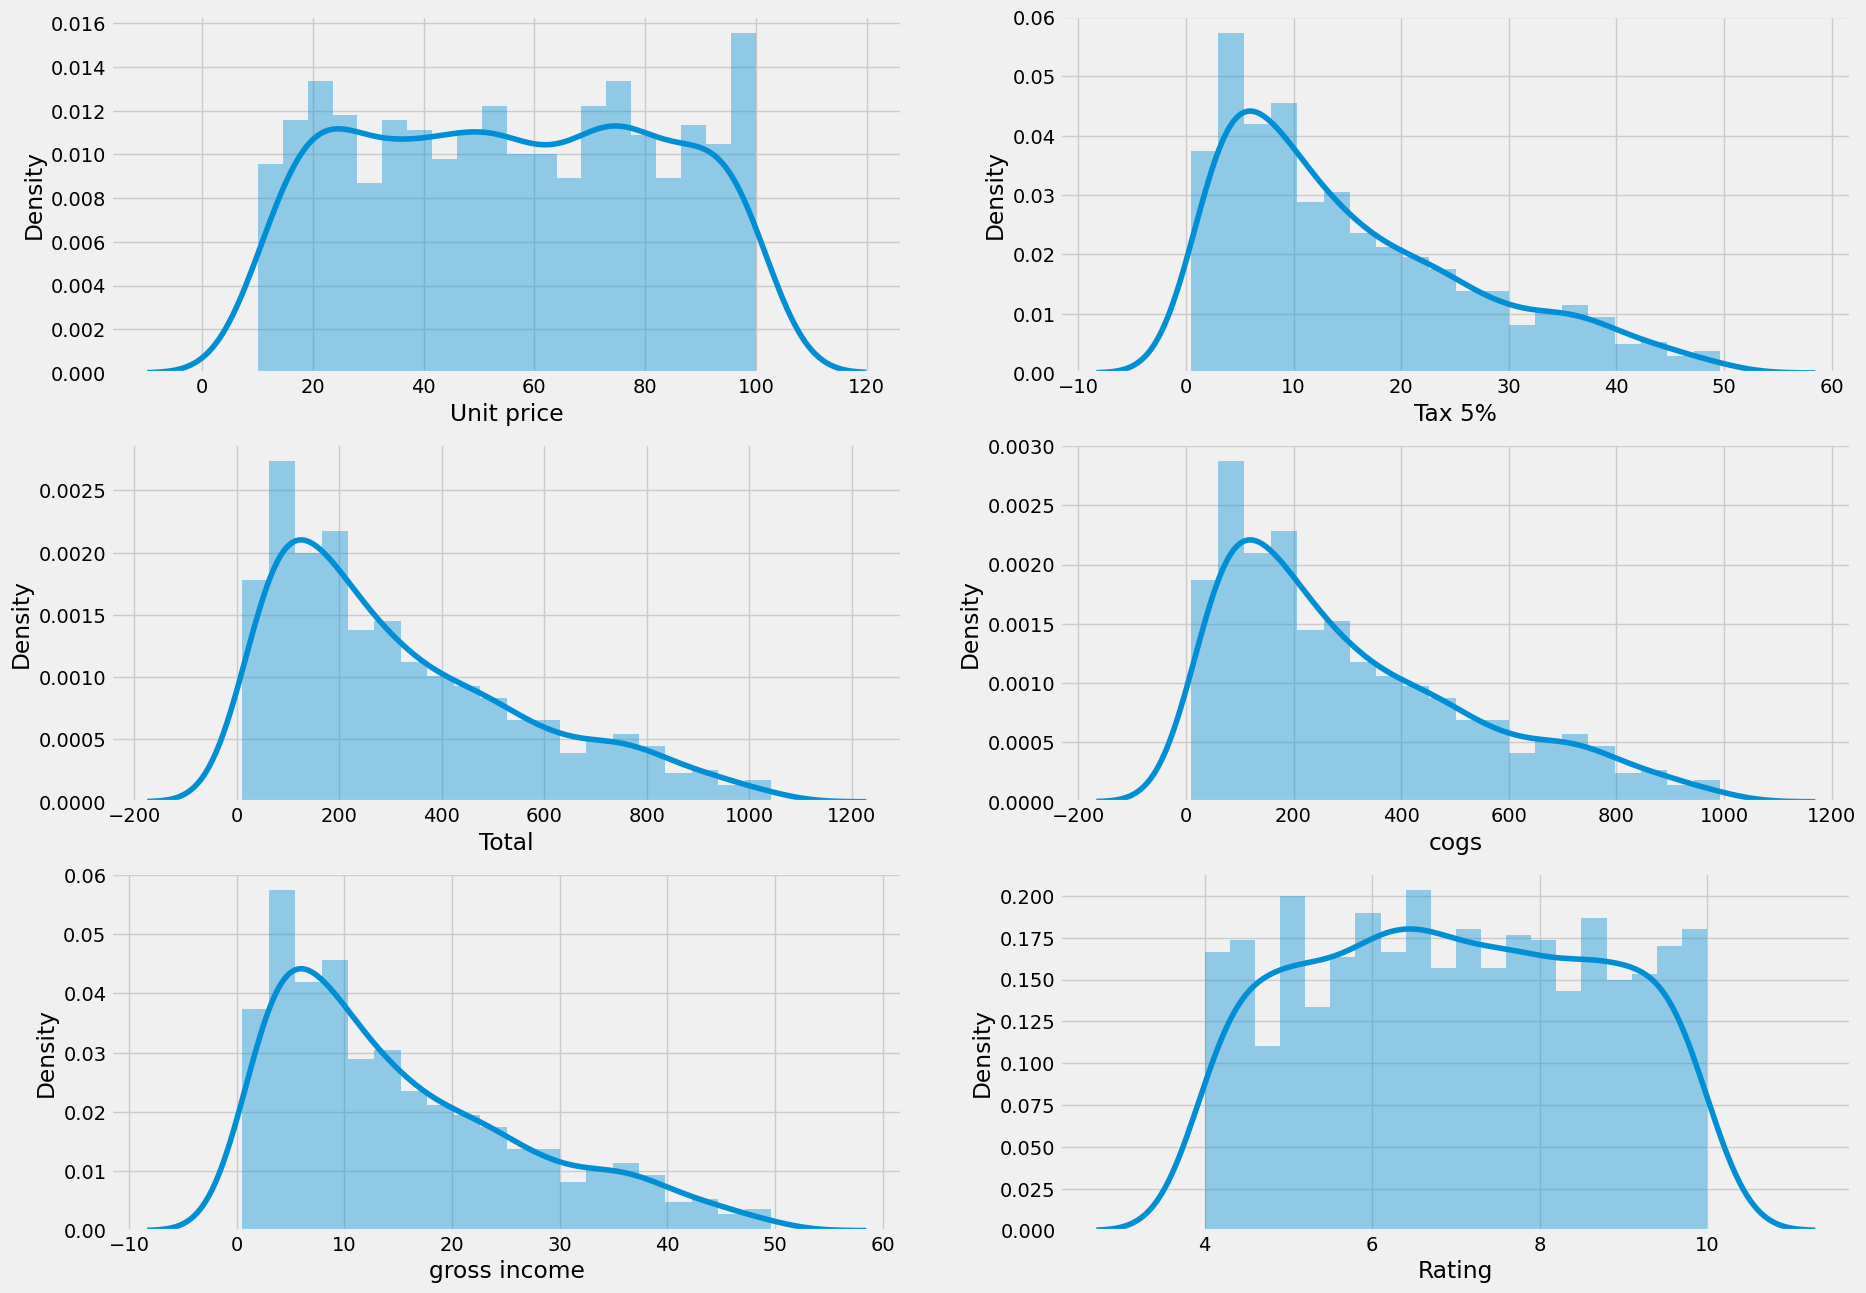

In [40]:
continuous = ['Unit price','Tax 5%', 'Total', 'cogs', 'gross income','Rating']
continuous_graph(df, continuous, 2,3)

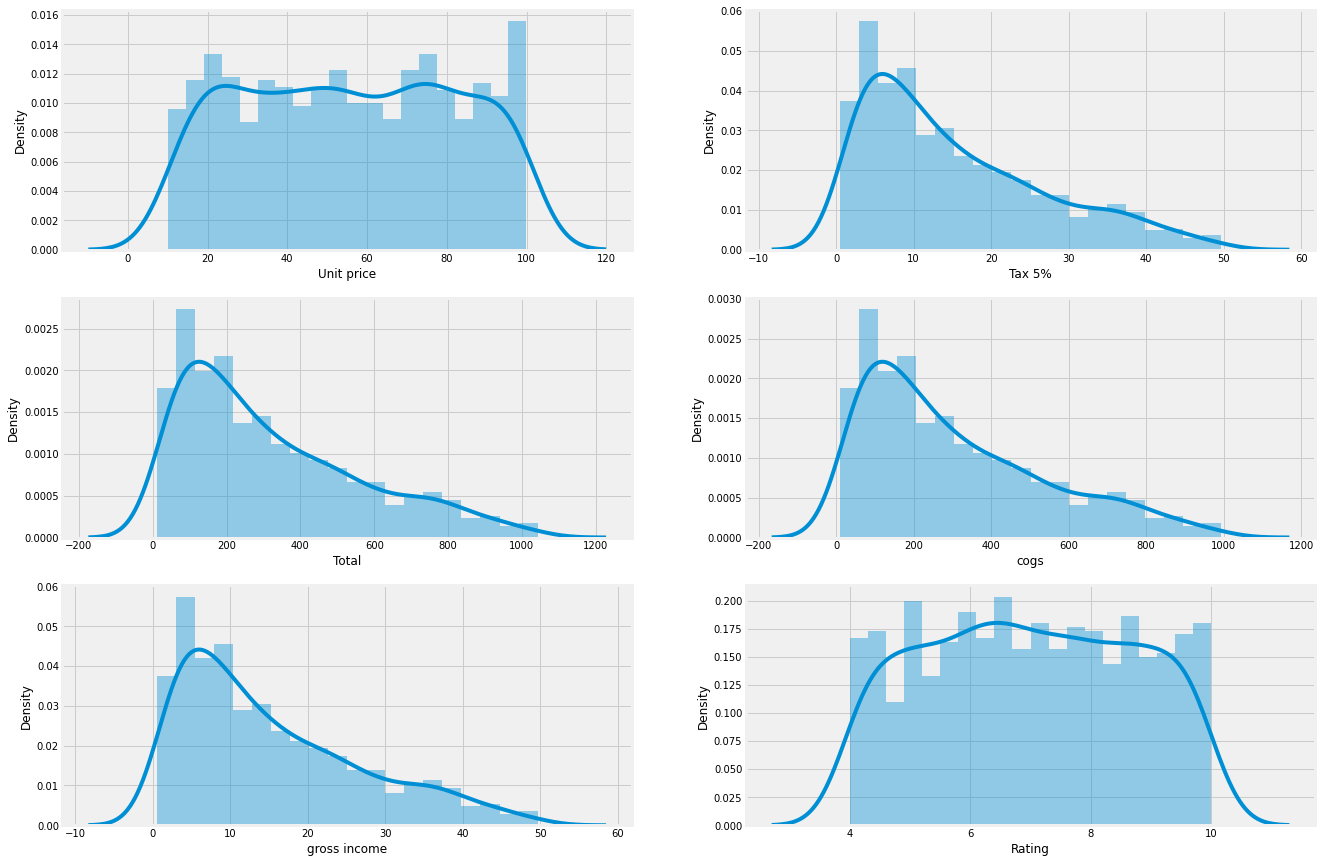

In [ ]:
continuous = ['Unit price','Tax 5%', 'Total', 'cogs', 'gross income','Rating']
continuous_graph(df, continuous, 2,3)

In [ ]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [27]:
hb = df[df['Product line']=='Health and beauty']
ea = df[df['Product line']=='Electronic accessories']
hl = df[df['Product line']=='Home and lifestyle']
st = df[df['Product line']=='Sports and travel']
fb = df[df['Product line']=='Food and beverages']
fa = df[df['Product line']=='Fashion accessories']

In [28]:
display(len(hb))
display(len(ea))
display(len(hl))
display(len(st))
display(len(fb))
display(len(fa))


152

170

160

166

174

178

In [29]:
def churn_check(col_names, col_num, row_num):
    col_num=col_num
    row_num=row_num
    fig, ax = plt.subplots(ncols=col_num, nrows=row_num, figsize=(20,row_num*5))

    for i, col in enumerate(col_names):
        sns.distplot(hb[col], label='Health and beauty', hist=False, bins=20, ax=ax[int(i/col_num), int(i%col_num)])
        sns.distplot(ea[col], label='Electronic accessories', hist=False, ax=ax[int(i/col_num),int(i%col_num)])
        sns.distplot(hl[col], label='Home and lifestyle', hist=False, ax=ax[int(i/col_num),int(i%col_num)])
        sns.distplot(st[col], label='Sports and travel', hist=False, ax=ax[int(i/col_num),int(i%col_num)])
        sns.distplot(fb[col], label='Food and beverages', hist=False, ax=ax[int(i/col_num),int(i%col_num)])
        sns.distplot(fa[col], label='Fashion accessories', hist=False, ax=ax[int(i/col_num),int(i%col_num)])

        #plt.legend(title="products")

    return

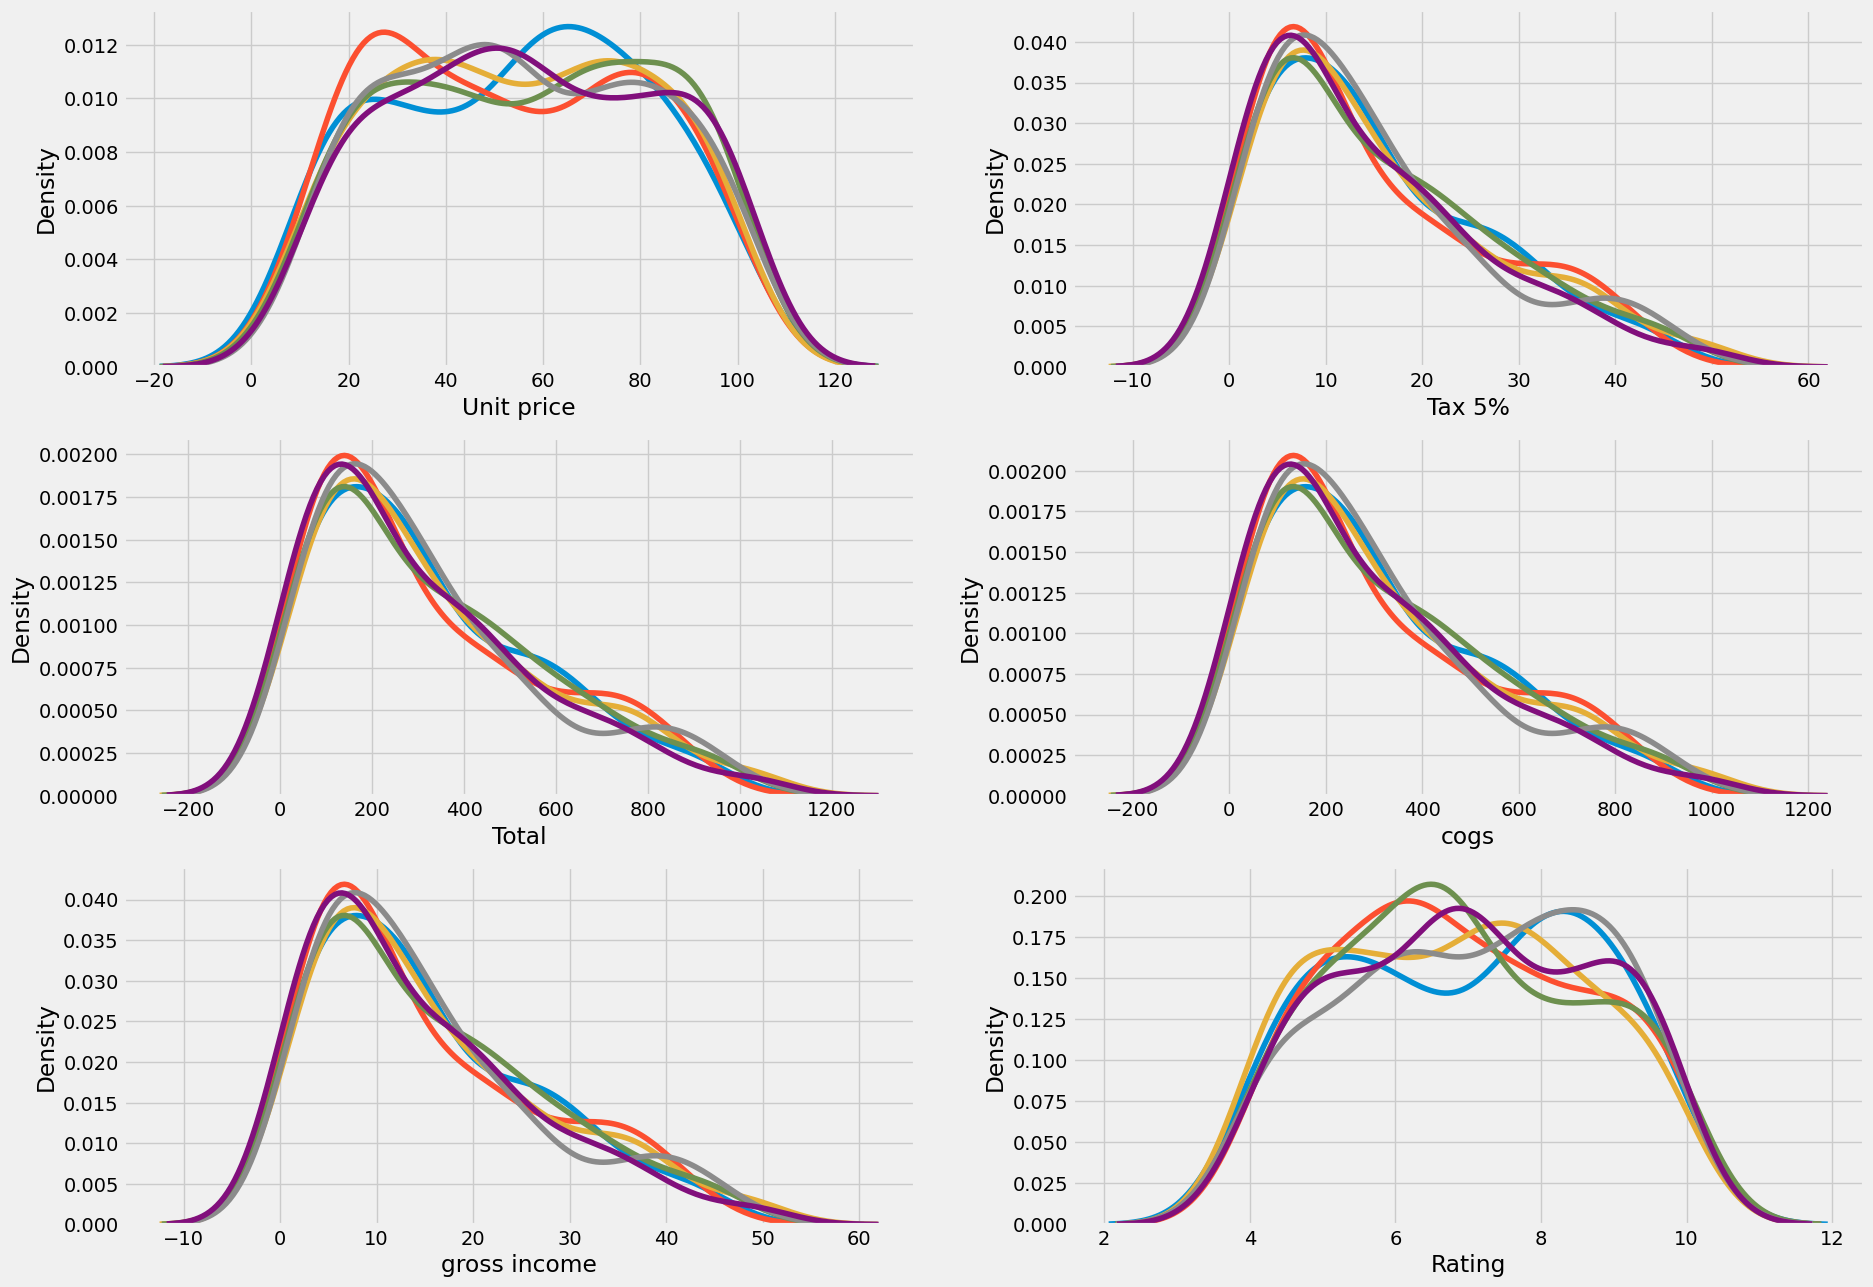

In [41]:
continuous = ['Unit price','Tax 5%', 'Total', 'cogs', 'gross income','Rating']
churn_check(continuous, 2,3)

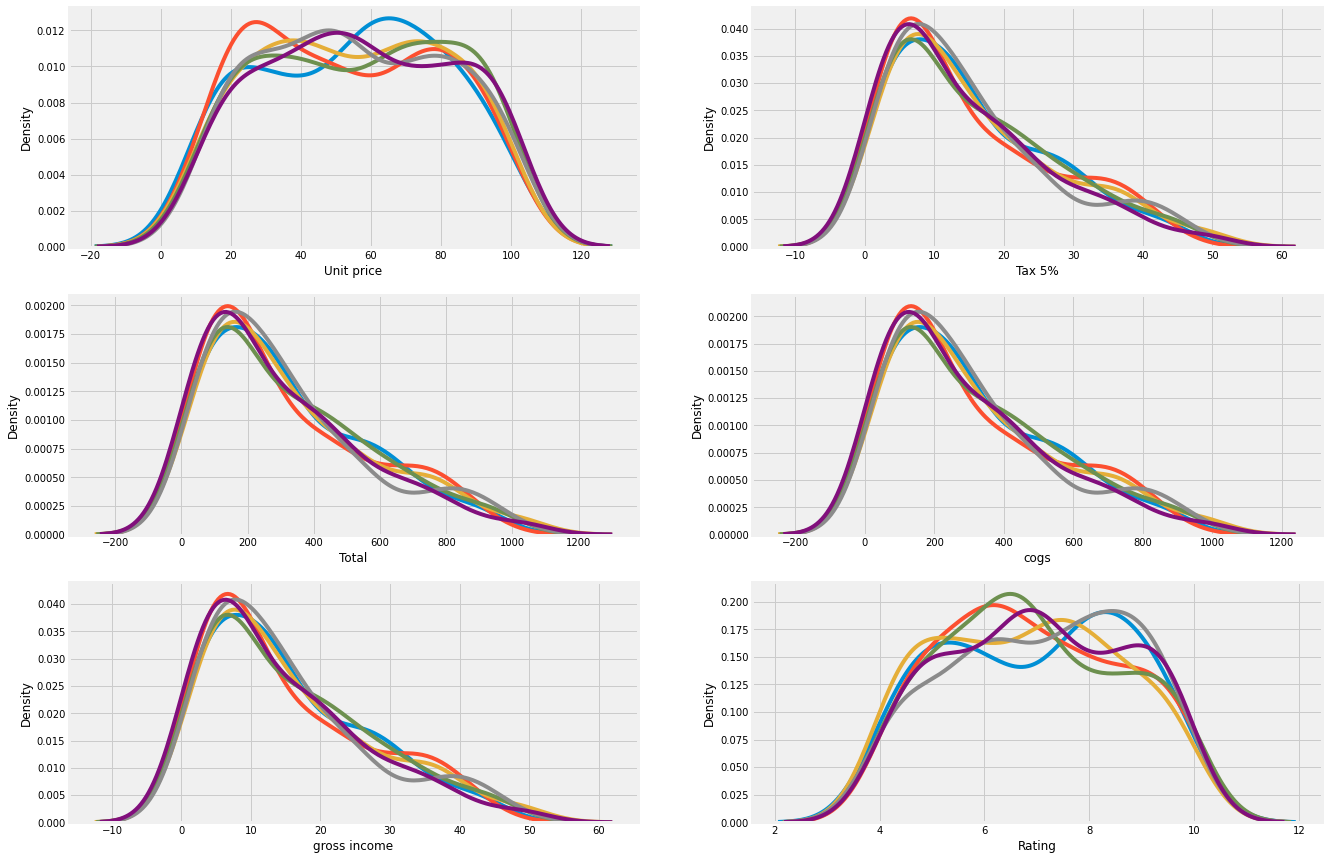

In [ ]:
continuous = ['Unit price','Tax 5%', 'Total', 'cogs', 'gross income','Rating']
churn_check(continuous, 2,3)

-----

### Please build a regression model to understand the sales at supermarkets and justify your model and variables (compared to other models).

- categorical variables -> encoding
- `branch`,`City`,`Customer type`,`Gender`,`Product line`,`Payment` : target encoding
- label encoding을 하게 된다면 regression modeling할 때 성능에 영향을 미치므로 target encoding으로 해준다.
- target encoding은 data leakage와 overfitting 문제가 발생할 수 있으므로 test set에는 영향이 미치지 않도록 해줘야 한다.

    
`target encoding을 통한 object 변수 처리`


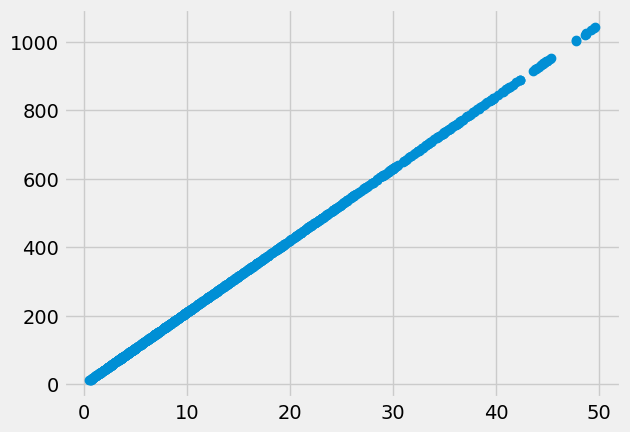

In [46]:
X = df[['gross income']]
y = df[['Total']]
plt.plot(X,y,'o')
plt.show()
#동일한 변수인지 확인

In [45]:

from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
line_fitter.fit(X, y)


LinearRegression()

In [47]:
X = df.drop(['Total','Invoice ID','Tax 5%','cogs','Date','Time'], axis=1) #Tax 5%+cogs = Total 이므로 tax,cogs변수는 제외해준다.
y = df[['gross income']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [57]:
X['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
# def target_encoding(var):
#     mean= df['is_applied'].mean()
#     agg= df.groupby(var)["is_applied"].agg(["count", "mean"])
#     counts = agg["count"]
#     means = agg["mean"]
#     weight= 100
#     smooth= (counts*means +weight*means) /(counts+weight)
#     df.loc[:, var+"_encode_smooth"]= df[var].map(smooth)
#     return df


# target_list = ['branch','City','Customer type','Gender','Product line','Payment']
# for i in target_list:
#     target_encoding(i)
# df = df.drop(target_list, axis=1)

In [49]:
from category_encoders import TargetEncoder
enc = TargetEncoder(cols=['Branch','City','Customer type','Gender','Product line','Payment'])
X_train = enc.fit_transform(X_train, y_train)

----
### one-hot encoding

In [69]:
from collections import defaultdict

class Multilabelencoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
        
    def fit_transform(self, X:pd.DataFrame, columns:list):
        if not isinstance(columns, list):
            columns = [columns]
        output = X.copy()
        output[columns] = X[columns].apply(lambda x:self.encoder_dict[x.name].fit_transform(x))
        
        return output

In [70]:
multi_label_encoders = Multilabelencoder()
df1 = multi_label_encoders.fit_transform(df, columns = ['Branch', 'City','Customer type', 'Gender','Product line'])
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,1,1,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,0,1,0,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,2,0,1,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,2,1,1,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [80]:
df1 = pd.get_dummies(df, columns=['Branch', 'City','Customer type', 'Gender','Product line','Payment'], 
               prefix=['Branch_', 'City_','Customer type_', 'Gender_','Product_','Payment_'])


X = df1.drop(['Total','Invoice ID','Tax 5%','cogs','Date','Time'], axis=1) #Tax 5%+cogs = Total 이므로 tax,cogs변수는 제외해준다.
y = df[['gross income']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [52]:
def evaluate(y_test, pred):
    res=[]
    res_table=[]

    # confusion matrix
    cm = confusion_matrix(y_test, pred); print(cm)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    res.extend([TP, FN, TN, FP])

    accuracy = accuracy_score(y_test, pred) ;print(f'Mean accuracy score: {accuracy:.3}'); res.append(accuracy)
    recall =recall_score(y_test, pred) ; print(f'recall: {recall: .3}') ; res.append(recall)
    precision= precision_score(y_test, pred) ; print(f'precision: {precision: .3}') ; res.append(precision)
    auc= roc_auc_score(y_test, pred) ; print(f'auc: {auc: .3}') ; res.append(auc)
    f1= f1_score(y_test, pred) ; print(f'f1: {f1: .3}') ; res.append(f1)

    res_table.append(res)
    df=pd.DataFrame(res_table, columns = ['TP', 'FN', 'TN', 'FP','accuracy','Recall','Precision', 'AUC', 'F1-Score'])
    df.index.name="Model"

    return df

### linear regression

In [82]:
# lr_model = LinearRegression()
# lr_model.fit(X_train,y_train)
# lr_predictions = lr_model.predict(X_val)

In [94]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("R^2 : ", r2_score(y_val, y_pred))
    print("MAE :", mean_absolute_error(y_val,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_val, y_pred)))

In [95]:
lr_model = LinearRegression()
run_experiment(lr_model)

R^2 :  1.0
MAE : 6.567524302170114e-15
RMSE: 8.370157595860123e-15


In [103]:
rmse_score(lr_model).mean()

7.0160068910560536e-15

In [105]:
seed = 42
rf_reg = RandomForestRegressor(random_state=seed, n_jobs=-1)
rf_reg.fit(X_train,y_train)
rg_predictions = rf_reg.predict(X_val)

In [100]:
def rmse_score(model):
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error"))
    return(rmse)

-----
#### lgbm

In [102]:
rmse_score(lgbm_regressor).mean()

0.38277688959931455

In [98]:
lgbm_regressor = LGBMRegressor(random_state=42, n_jobs=-1)
lgbm_regressor.fit(X_train, y_train,
                  eval_set = [(X_train, y_train),(X_val, y_val)],
                  eval_metric='rmse')
lgbm_pred = lgbm_regressor.predict(X_val)

[1]	training's rmse: 10.4301	training's l2: 108.788	valid_1's rmse: 10.9576	valid_1's l2: 120.07
[2]	training's rmse: 9.39455	training's l2: 88.2576	valid_1's rmse: 9.8648	valid_1's l2: 97.3144
[3]	training's rmse: 8.46026	training's l2: 71.576	valid_1's rmse: 8.86887	valid_1's l2: 78.6569
[4]	training's rmse: 7.61804	training's l2: 58.0346	valid_1's rmse: 7.96406	valid_1's l2: 63.4263
[5]	training's rmse: 6.86017	training's l2: 47.0619	valid_1's rmse: 7.15088	valid_1's l2: 51.1351
[6]	training's rmse: 6.17801	training's l2: 38.1678	valid_1's rmse: 6.42334	valid_1's l2: 41.2593
[7]	training's rmse: 5.56623	training's l2: 30.9829	valid_1's rmse: 5.77631	valid_1's l2: 33.3658
[8]	training's rmse: 5.01406	training's l2: 25.1408	valid_1's rmse: 5.18138	valid_1's l2: 26.8467
[9]	training's rmse: 4.5172	training's l2: 20.4051	valid_1's rmse: 4.65338	valid_1's l2: 21.6539
[10]	training's rmse: 4.07031	training's l2: 16.5674	valid_1's rmse: 4.17943	valid_1's l2: 17.4677
[11]	training's rmse: 3

------
### xgboost

In [99]:
xgb_reg= XGBRegressor(random_state=seed, n_jobs=-1)
xgb_reg.fit(X_train, y_train,
            eval_set = [(X_train, y_train),(X_val, y_val)],
            eval_metric='rmse')
lgbm_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:13.23293	validation_1-rmse:13.99364
[1]	validation_0-rmse:9.36386	validation_1-rmse:9.85124
[2]	validation_0-rmse:6.62888	validation_1-rmse:6.91745
[3]	validation_0-rmse:4.69823	validation_1-rmse:4.82237
[4]	validation_0-rmse:3.33572	validation_1-rmse:3.36614
[5]	validation_0-rmse:2.37199	validation_1-rmse:2.38395
[6]	validation_0-rmse:1.69336	validation_1-rmse:1.68611
[7]	validation_0-rmse:1.21476	validation_1-rmse:1.21022
[8]	validation_0-rmse:0.88020	validation_1-rmse:0.84919
[9]	validation_0-rmse:0.64842	validation_1-rmse:0.61156
[10]	validation_0-rmse:0.48194	validation_1-rmse:0.45015
[11]	validation_0-rmse:0.36683	validation_1-rmse:0.34715
[12]	validation_0-rmse:0.28888	validation_1-rmse:0.28132
[13]	validation_0-rmse:0.23024	validation_1-rmse:0.23804
[14]	validation_0-rmse:0.19059	validation_1-rmse:0.21203
[15]	validation_0-rmse:0.16342	validation_1-rmse:0.20013
[16]	validation_0-rmse:0.14337	validation_1-rmse:0.19562
[17]	validation_0-rmse:0.12997	validati

In [107]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [108]:
sampler = TPESampler(seed=10)

def objective(trial):

    lgbm_param = {
        'objective': 'regression',
        'verbose': -1,
        'metric': 'mse', 
        'num_leaves': trial.suggest_int('num_leaves', 2, 1024, step=1, log=True), 
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 10.0),
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model_lgbm = LGBMRegressor(**lgbm_param)
    model_lgbm = model_lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
                           verbose=0, early_stopping_rounds=25)
                                               
    MSE = mean_squared_error(y_val, model_lgbm.predict(X_val))
    return MSE

optuna_lgbm = optuna.create_study(direction='minimize', sampler=sampler)

# * n_trials : optuna를 몇번 실행하여 hyper parameter를 찾을 것인지
optuna_lgbm.optimize(objective, n_trials=100)

[I 2023-06-26 18:58:55,754] A new study created in memory with name: no-name-a3c536d1-9dfa-416b-aee7-407cbcb38625
[I 2023-06-26 18:58:55,963] Trial 0 finished with value: 148.27858670367183 and parameters: {'num_leaves': 230, 'colsample_bytree': 0.7062255848078204, 'reg_alpha': 0.6336482349262754, 'reg_lambda': 7.488038825386118, 'max_depth': 9, 'learning_rate': 2.2324403996622945e-07, 'n_estimators': 674, 'min_child_samples': 78, 'subsample': 0.46704202331689854}. Best is trial 0 with value: 148.27858670367183.
[I 2023-06-26 18:58:56,219] Trial 1 finished with value: 16.3123703716034 and parameters: {'num_leaves': 3, 'colsample_bytree': 0.9056079455103392, 'reg_alpha': 0.9533933461949365, 'reg_lambda': 0.039482663279144514, 'max_depth': 9, 'learning_rate': 0.0007511484404875245, 'n_estimators': 1876, 'min_child_samples': 74, 'subsample': 0.5226478358414336}. Best is trial 1 with value: 16.3123703716034.
[I 2023-06-26 18:58:56,675] Trial 2 finished with value: 110.82476796173783 and pa

[I 2023-06-26 18:59:04,442] Trial 21 finished with value: 0.06265380866956635 and parameters: {'num_leaves': 9, 'colsample_bytree': 0.8293054795663354, 'reg_alpha': 0.7742796874945577, 'reg_lambda': 9.260426493576558, 'max_depth': 13, 'learning_rate': 0.009392014467796745, 'n_estimators': 1224, 'min_child_samples': 22, 'subsample': 0.9155734260718277}. Best is trial 11 with value: 0.017577825600618574.
[I 2023-06-26 18:59:04,874] Trial 22 finished with value: 1.9161915049377996 and parameters: {'num_leaves': 22, 'colsample_bytree': 0.8294394877827473, 'reg_alpha': 0.7906327993885411, 'reg_lambda': 9.0585793132912, 'max_depth': 13, 'learning_rate': 0.0025135197959766055, 'n_estimators': 1055, 'min_child_samples': 5, 'subsample': 0.8921719617168853}. Best is trial 11 with value: 0.017577825600618574.
[I 2023-06-26 18:59:05,031] Trial 23 finished with value: 0.11228833798225595 and parameters: {'num_leaves': 5, 'colsample_bytree': 0.8693082561901526, 'reg_alpha': 0.8702243770771941, 'reg_

[I 2023-06-26 18:59:14,971] Trial 42 finished with value: 0.3419913121661953 and parameters: {'num_leaves': 17, 'colsample_bytree': 0.8266973874650437, 'reg_alpha': 0.8942086430412145, 'reg_lambda': 9.444348808741909, 'max_depth': 12, 'learning_rate': 0.005003763585069664, 'n_estimators': 1366, 'min_child_samples': 40, 'subsample': 0.95450298651009}. Best is trial 11 with value: 0.017577825600618574.
[I 2023-06-26 18:59:15,492] Trial 43 finished with value: 3.39870806777186 and parameters: {'num_leaves': 10, 'colsample_bytree': 0.795435000310872, 'reg_alpha': 0.8325355128591657, 'reg_lambda': 9.894020945964074, 'max_depth': 10, 'learning_rate': 0.0017472859159112686, 'n_estimators': 1363, 'min_child_samples': 15, 'subsample': 0.8981057003343667}. Best is trial 11 with value: 0.017577825600618574.
[I 2023-06-26 18:59:16,472] Trial 44 finished with value: 0.021920236805380373 and parameters: {'num_leaves': 27, 'colsample_bytree': 0.8407064121082505, 'reg_alpha': 0.7414187040347432, 'reg_

[I 2023-06-26 18:59:29,314] Trial 63 finished with value: 0.06630828226305345 and parameters: {'num_leaves': 92, 'colsample_bytree': 0.8647180752055572, 'reg_alpha': 0.7933510544276974, 'reg_lambda': 5.838863696439832, 'max_depth': 4, 'learning_rate': 0.0022250336048697176, 'n_estimators': 2513, 'min_child_samples': 5, 'subsample': 0.9149259005331796}. Best is trial 11 with value: 0.017577825600618574.
[I 2023-06-26 18:59:30,264] Trial 64 finished with value: 0.028334205288402883 and parameters: {'num_leaves': 129, 'colsample_bytree': 0.8512526336449379, 'reg_alpha': 0.7702577735473652, 'reg_lambda': 5.429574995971237, 'max_depth': 5, 'learning_rate': 0.0034340916635838977, 'n_estimators': 2508, 'min_child_samples': 9, 'subsample': 0.8330645615515914}. Best is trial 11 with value: 0.017577825600618574.
[I 2023-06-26 18:59:31,246] Trial 65 finished with value: 0.0253804538033991 and parameters: {'num_leaves': 123, 'colsample_bytree': 0.8488973640587697, 'reg_alpha': 0.7617785220625201, 

[I 2023-06-26 18:59:49,745] Trial 84 finished with value: 0.05034459521517163 and parameters: {'num_leaves': 41, 'colsample_bytree': 0.8444994858322823, 'reg_alpha': 0.7699518443866059, 'reg_lambda': 6.8798324785903855, 'max_depth': 6, 'learning_rate': 0.009415213894092143, 'n_estimators': 2882, 'min_child_samples': 13, 'subsample': 0.916098955908909}. Best is trial 11 with value: 0.017577825600618574.
[I 2023-06-26 18:59:50,411] Trial 85 finished with value: 0.06189953236069057 and parameters: {'num_leaves': 77, 'colsample_bytree': 0.829361149422901, 'reg_alpha': 0.8343638576697582, 'reg_lambda': 5.80298363791121, 'max_depth': 3, 'learning_rate': 0.0036513175429226425, 'n_estimators': 2606, 'min_child_samples': 7, 'subsample': 0.9772356027663202}. Best is trial 11 with value: 0.017577825600618574.
[I 2023-06-26 18:59:51,645] Trial 86 finished with value: 0.07952588977114448 and parameters: {'num_leaves': 62, 'colsample_bytree': 0.8128967999323599, 'reg_alpha': 0.7076233784049943, 'reg

In [109]:
lgbm_trial = optuna_lgbm.best_trial
lgbm_trial_params = lgbm_trial.params
print('Best Trial: score {},\nparams {}'.format(lgbm_trial.value, lgbm_trial_params))

Best Trial: score 0.017577825600618574,
params {'num_leaves': 10, 'colsample_bytree': 0.848467258716409, 'reg_alpha': 0.7269965722688396, 'reg_lambda': 9.926885546737706, 'max_depth': 12, 'learning_rate': 0.009840849968468825, 'n_estimators': 1314, 'min_child_samples': 8, 'subsample': 0.9505076760352583}


In [110]:
lgbm_trial_params

{'num_leaves': 10,
 'colsample_bytree': 0.848467258716409,
 'reg_alpha': 0.7269965722688396,
 'reg_lambda': 9.926885546737706,
 'max_depth': 12,
 'learning_rate': 0.009840849968468825,
 'n_estimators': 1314,
 'min_child_samples': 8,
 'subsample': 0.9505076760352583}

In [111]:
# Modeling fit
lgbm = LGBMRegressor(**lgbm_trial_params)
lgbm_study = lgbm.fit(X_train, y_train)

# Predict the y_test
lgbm_study.predict(X_val)

array([24.84152504, 28.95336802, 19.61207149,  6.40986414,  2.16274992,
       28.94800909,  6.0063236 , 34.65302042, 21.2631116 ,  6.59852109,
       20.11925169, 22.1231121 , 10.18864266, 12.04064337, 13.85408813,
       15.64004703, 28.08199079, 10.50861806, 36.01370143,  8.7843199 ,
       19.98073729,  7.92422682,  6.02266504,  5.96084358, 11.75218797,
        9.33911493, 35.27337519,  1.48576914,  6.96923224,  2.71162848,
        3.66425083, 28.90816631,  4.51042344, 20.64525452,  9.18384817,
        8.34648238, 31.51918904,  9.85528962,  9.14372016,  9.1223909 ,
       10.15676343, 43.67933488,  3.41889437,  8.61792388,  4.4666387 ,
       19.17106549, 10.71370139,  3.38391058, 16.19065884, 13.41975134,
       20.510706  ,  4.83955894,  3.34940086, 12.94984743,  8.63614299,
       23.44688809, 21.84485878,  2.9024588 , 21.70493625, 10.53778648,
        5.79980451,  1.62296993,  4.03389073, 45.2289125 , 18.26208966,
       24.35610551, 17.57114619, 36.27216387, 44.52104692,  5.66

In [112]:
lgbm_study.predict(X_val).shape

(200,)

-----
### 3번. build a model to understand customers' cash payment

In [118]:
cash_data = df[df['Payment']=='Cash']
cash_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,2,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
11,529-56-3974,1,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,4.761905,5.1020,6.8
14,829-34-3910,0,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,1,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
26,649-29-6775,1,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,2/8/2019,15:31,Cash,33.52,4.761905,1.6760,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,2,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,2,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
997,727-02-1313,0,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [122]:
def change_payment(values):
    if values=='Cash':
        return 1
    else:
        return 0

In [125]:
df2 = df.copy()
df2['Payment']=df2['Payment'].apply(change_payment)
df2

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,0,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,1,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,0,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,0,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,0,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,0,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,0,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,1,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,1,65.82,4.761905,3.2910,4.1


In [128]:
df3 = pd.get_dummies(df2, columns=['City','Customer type', 'Gender','Product line'], 
               prefix=[ 'City_','Customer type_', 'Gender_','Product_'])

X = df3.drop(['Total','Invoice ID','Tax 5%','cogs','Date','Time','Payment'], axis=1) #Tax 5%+cogs = Total 이므로 tax,cogs변수는 제외해준다.
y = df3[['Payment']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

### logistic regression, random forest

In [129]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

from sklearn import metrics
logistic_pred = logistic_model.predict(X_val)
# Print the prediction accuracy
print(metrics.accuracy_score(y_val, logistic_pred))

0.63


In [130]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_val)
print(metrics.accuracy_score(y_val, prediction_test))

0.64


----
### lgbm

In [132]:
lgbm = LGBMClassifier(tree_method = 'gpu_hist', gpu_id=0)

params = {'n_estimators': [1000, 2000, 3000, 4000],
          'learning_rate': [0.1, 0.05, 0.01],
          'max_depth': [5,7,9],
          'subsample': [0,7, 0.8, 0.9, 1]
         }

evals = [(X_val, y_val)]
lgbm_grid = RandomizedSearchCV(lgbm, param_distributions= params,
                               n_iter=3, scoring="f1", cv=3, refit=True, random_state=42)


lgbm_grid.fit(X_train, y_train.values.ravel(), early_stopping_rounds=100,
              eval_metric="f1", eval_set = evals)

[LightGBM] [Warning] Unknown parameter: gpu_id
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's binary_logloss: 0.655495
[2]	valid_0's binary_logloss: 0.658532
[3]	valid_0's binary_logloss: 0.658124
[4]	valid_0's binary_logloss: 0.660823
[5]	valid_0's binary_logloss: 0.66398
[6]	valid_0's binary_logloss: 0.664587
[7]	valid_0's binary_logloss: 0.668437
[8]	valid_0's binary_logloss: 0.670447
[9]	valid_0's binary_logloss: 0.672624
[10]	valid_0's binary_logloss: 0.672181
[11]	valid_0's binary_logloss: 0.674647
[12]	valid_0's binary_logloss: 0.678456
[13]	valid_0's binary_logloss: 0.681774
[14]	valid_0's binary_logloss: 0.680041
[15]	valid_0's binary_logloss: 0.683292
[16]	valid_0's binary_logloss: 0.686697
[17]	valid_0's binary_logloss: 0.686802
[18]	valid_0's binary_logloss: 0.686278
[19]	valid_0's binary_logloss: 0.691392
[20]	valid_0's binary_logloss: 0.693092
[21]	valid_0's binary_logloss: 0.696164
[22]	valid_0's binary_logloss: 0.694904
[23]	valid_0's binary_logloss: 

[1]	valid_0's binary_logloss: 0.658407
[2]	valid_0's binary_logloss: 0.667134
[3]	valid_0's binary_logloss: 0.673825
[4]	valid_0's binary_logloss: 0.678519
[5]	valid_0's binary_logloss: 0.681685
[6]	valid_0's binary_logloss: 0.691069
[7]	valid_0's binary_logloss: 0.698798
[8]	valid_0's binary_logloss: 0.70741
[9]	valid_0's binary_logloss: 0.709303
[10]	valid_0's binary_logloss: 0.712552
[11]	valid_0's binary_logloss: 0.714516
[12]	valid_0's binary_logloss: 0.721565
[13]	valid_0's binary_logloss: 0.72234
[14]	valid_0's binary_logloss: 0.727291
[15]	valid_0's binary_logloss: 0.730564
[16]	valid_0's binary_logloss: 0.733613
[17]	valid_0's binary_logloss: 0.741763
[18]	valid_0's binary_logloss: 0.744119
[19]	valid_0's binary_logloss: 0.746748
[20]	valid_0's binary_logloss: 0.749825
[21]	valid_0's binary_logloss: 0.752931
[22]	valid_0's binary_logloss: 0.754328
[23]	valid_0's binary_logloss: 0.755305
[24]	valid_0's binary_logloss: 0.757054
[25]	valid_0's binary_logloss: 0.761643
[26]	valid_

[77]	valid_0's binary_logloss: 0.783892
[78]	valid_0's binary_logloss: 0.785278
[79]	valid_0's binary_logloss: 0.787865
[80]	valid_0's binary_logloss: 0.787863
[81]	valid_0's binary_logloss: 0.788082
[82]	valid_0's binary_logloss: 0.787655
[83]	valid_0's binary_logloss: 0.790055
[84]	valid_0's binary_logloss: 0.789421
[85]	valid_0's binary_logloss: 0.790527
[86]	valid_0's binary_logloss: 0.790221
[87]	valid_0's binary_logloss: 0.79089
[88]	valid_0's binary_logloss: 0.792785
[89]	valid_0's binary_logloss: 0.795029
[90]	valid_0's binary_logloss: 0.795136
[91]	valid_0's binary_logloss: 0.796156
[92]	valid_0's binary_logloss: 0.797168
[93]	valid_0's binary_logloss: 0.799481
[94]	valid_0's binary_logloss: 0.802731
[95]	valid_0's binary_logloss: 0.8032
[96]	valid_0's binary_logloss: 0.805175
[97]	valid_0's binary_logloss: 0.806007
[98]	valid_0's binary_logloss: 0.810303
[99]	valid_0's binary_logloss: 0.810307
[100]	valid_0's binary_logloss: 0.809933
[101]	valid_0's binary_logloss: 0.810569
[

[51]	valid_0's binary_logloss: 0.686721
[52]	valid_0's binary_logloss: 0.687153
[53]	valid_0's binary_logloss: 0.68792
[54]	valid_0's binary_logloss: 0.688979
[55]	valid_0's binary_logloss: 0.6893
[56]	valid_0's binary_logloss: 0.689646
[57]	valid_0's binary_logloss: 0.690417
[58]	valid_0's binary_logloss: 0.691186
[59]	valid_0's binary_logloss: 0.692303
[60]	valid_0's binary_logloss: 0.692656
[61]	valid_0's binary_logloss: 0.693063
[62]	valid_0's binary_logloss: 0.693709
[63]	valid_0's binary_logloss: 0.694481
[64]	valid_0's binary_logloss: 0.695532
[65]	valid_0's binary_logloss: 0.695964
[66]	valid_0's binary_logloss: 0.696428
[67]	valid_0's binary_logloss: 0.697194
[68]	valid_0's binary_logloss: 0.697499
[69]	valid_0's binary_logloss: 0.698215
[70]	valid_0's binary_logloss: 0.698588
[71]	valid_0's binary_logloss: 0.699202
[72]	valid_0's binary_logloss: 0.699642
[73]	valid_0's binary_logloss: 0.700436
[74]	valid_0's binary_logloss: 0.701143
[75]	valid_0's binary_logloss: 0.701347
[76

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(gpu_id=0, tree_method='gpu_hist'),
                   n_iter=3,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [5, 7, 9],
                                        'n_estimators': [1000, 2000, 3000,
                                                         4000],
                                        'subsample': [0, 7, 0.8, 0.9, 1]},
                   random_state=42, scoring='f1')

In [133]:
lgbm_grid.best_params_

{'subsample': 1, 'n_estimators': 4000, 'max_depth': 5, 'learning_rate': 0.1}

In [ ]:
pred_lgbm_clf = lgbm_grid.predict(X_val)
eval_lgbm_clf = evaluate(pred_lgbm_clf, y_val)
eval_lgbm_clf

---
### xgboost

In [137]:
xgb_g1 = XGBClassifier(n_estimators=4000, random_state=42,
                        subsample=0.5, max_depth=15, learning_rate=0.1,)
                       #tree_method = 'gpu_hist', gpu_id=0)

xgb_model = xgb_g1.fit(X_train, y_train.values.ravel(), early_stopping_rounds=30,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_val, y_val)])
     
pred_xgb_g1 = xgb_model.predict(X_val)

[0]	validation_0-auc:0.68286	validation_1-auc:0.40603
[1]	validation_0-auc:0.74984	validation_1-auc:0.45671
[2]	validation_0-auc:0.78940	validation_1-auc:0.46246
[3]	validation_0-auc:0.83094	validation_1-auc:0.46891
[4]	validation_0-auc:0.84480	validation_1-auc:0.45416
[5]	validation_0-auc:0.86711	validation_1-auc:0.44873
[6]	validation_0-auc:0.87642	validation_1-auc:0.43658
[7]	validation_0-auc:0.89005	validation_1-auc:0.44792
[8]	validation_0-auc:0.90063	validation_1-auc:0.43142
[9]	validation_0-auc:0.90486	validation_1-auc:0.44640
[10]	validation_0-auc:0.91504	validation_1-auc:0.44455
[11]	validation_0-auc:0.91912	validation_1-auc:0.44813
[12]	validation_0-auc:0.92664	validation_1-auc:0.44390
[13]	validation_0-auc:0.93205	validation_1-auc:0.43327
[14]	validation_0-auc:0.93550	validation_1-auc:0.42177
[15]	validation_0-auc:0.93921	validation_1-auc:0.42806
[16]	validation_0-auc:0.94305	validation_1-auc:0.43012
[17]	validation_0-auc:0.94817	validation_1-auc:0.42535
[18]	validation_0-au

In [138]:
eval_xgb_g1 = evaluate(pred_xgb_g1, y_val)
eval_xgb_g1

[[105  63]
 [ 23   9]]
Mean accuracy score: 0.57
recall:  0.281
precision:  0.125
auc:  0.453
f1:  0.173


,TP,FN,TN,FP,accuracy,Recall,Precision,AUC,F1-Score
Model,,,,,,,,,
0,9,23,105,63,0.57,0.28125,0.125,0.453125,0.173077
